In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn import model_selection
from tensorflow import keras
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import *
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization

%matplotlib inline

In [2]:
labels=os.listdir(r'C:\Users\Aditi\Downloads\diaretdb1_v_1_1\diaretdb1_v_1_1\resources\images')
print(labels)

['fundus', 'groundtruth-hardexudates', 'groundtruth-hemorrhages', 'groundtruth-redsmalldots', 'groundtruth-softexudates']


In [3]:
all_files=[]
for item in labels:
    files=os.listdir('C:/Users/Aditi/Downloads/diaretdb1_v_1_1/diaretdb1_v_1_1/resources/images'+'/'+item)
    for i in files:
        all_files.append((item,str(item+'/'+i)))

In [4]:
all_files

[('fundus', 'fundus/image001.png'),
 ('fundus', 'fundus/image002.png'),
 ('fundus', 'fundus/image003.png'),
 ('fundus', 'fundus/image004.png'),
 ('fundus', 'fundus/image005.png'),
 ('fundus', 'fundus/image006.png'),
 ('fundus', 'fundus/image007.png'),
 ('fundus', 'fundus/image008.png'),
 ('fundus', 'fundus/image009.png'),
 ('fundus', 'fundus/image010.png'),
 ('fundus', 'fundus/image011.png'),
 ('fundus', 'fundus/image012.png'),
 ('fundus', 'fundus/image013.png'),
 ('fundus', 'fundus/image014.png'),
 ('fundus', 'fundus/image015.png'),
 ('fundus', 'fundus/image016.png'),
 ('fundus', 'fundus/image017.png'),
 ('fundus', 'fundus/image018.png'),
 ('fundus', 'fundus/image019.png'),
 ('fundus', 'fundus/image020.png'),
 ('fundus', 'fundus/image021.png'),
 ('fundus', 'fundus/image022.png'),
 ('fundus', 'fundus/image023.png'),
 ('fundus', 'fundus/image024.png'),
 ('fundus', 'fundus/image025.png'),
 ('fundus', 'fundus/image026.png'),
 ('fundus', 'fundus/image027.png'),
 ('fundus', 'fundus/image028

In [5]:
data=pd.DataFrame(data=all_files,columns=['Labels','Image'])

In [6]:
data

,Labels,Image
0,fundus,fundus/image001.png
1,fundus,fundus/image002.png
2,fundus,fundus/image003.png
3,fundus,fundus/image004.png
4,fundus,fundus/image005.png
...,...,...
440,groundtruth-softexudates,groundtruth-softexudates/image085.png
441,groundtruth-softexudates,groundtruth-softexudates/image086.png
442,groundtruth-softexudates,groundtruth-softexudates/image087.png
443,groundtruth-softexudates,groundtruth-softexudates/image088.png


In [7]:
images=[]
label=[]
path='C:/Users/Aditi/Downloads/diaretdb1_v_1_1/diaretdb1_v_1_1/resources/images'
for i in range(0,len(all_files)):
    filepath=str(path+'/'+all_files[i][1])
    img=(cv2.imread(filepath))
    img=cv2.resize(img,(227,227))
    images.append(img)
    label.append(all_files[i][0])

In [8]:
images=np.array(images)

In [9]:
images.shape

(445, 227, 227, 3)

In [10]:
y=pd.get_dummies(data.Labels)
print(y)

     fundus  groundtruth-hardexudates  groundtruth-hemorrhages  \
0         1                         0                        0   
1         1                         0                        0   
2         1                         0                        0   
3         1                         0                        0   
4         1                         0                        0   
..      ...                       ...                      ...   
440       0                         0                        0   
441       0                         0                        0   
442       0                         0                        0   
443       0                         0                        0   
444       0                         0                        0   

     groundtruth-redsmalldots  groundtruth-softexudates  
0                           0                         0  
1                           0                         0  
2                           0    

In [11]:
input_shape=(227,227,3)

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),strides=(4,4)))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
Total params: 35,328
Trainable params: 35,136
Non-trainable params: 192
_________________________________________________________________


In [15]:
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [17]:
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [19]:
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [21]:
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [23]:
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [25]:
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [27]:
model.add(Flatten())

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [29]:
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [31]:
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [33]:
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [35]:
model.add(Dense(5))
model.add(Activation('softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                        

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images, y, shuffle=True, random_state=42, test_size=0.2)
x_test,x_val,y_test,y_val=train_test_split(x_test, y_test, shuffle=True, random_state=42, test_size=0.5 )

In [38]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [39]:
! pip install h5py

You should consider upgrading via the 'c:\users\aditi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [40]:
from keras.callbacks import ModelCheckpoint

model_checkpoint=ModelCheckpoint('Model.h5', monitor='acc', mode='max', verbose=1, save_best_only=True)

In [41]:
history = model.fit(x_train, y_train, epochs=100, verbose=2, callbacks=[model_checkpoint])

Epoch 1/100

Epoch 00001: acc improved from -inf to 0.43539, saving model to Model.h5
12/12 - 25s - loss: 1.8980 - acc: 0.4354 - 25s/epoch - 2s/step
Epoch 2/100

Epoch 00002: acc improved from 0.43539 to 0.50000, saving model to Model.h5
12/12 - 25s - loss: 1.3517 - acc: 0.5000 - 25s/epoch - 2s/step
Epoch 3/100

Epoch 00003: acc improved from 0.50000 to 0.53090, saving model to Model.h5
12/12 - 23s - loss: 1.1529 - acc: 0.5309 - 23s/epoch - 2s/step
Epoch 4/100

Epoch 00004: acc improved from 0.53090 to 0.54494, saving model to Model.h5
12/12 - 25s - loss: 1.1261 - acc: 0.5449 - 25s/epoch - 2s/step
Epoch 5/100

Epoch 00005: acc improved from 0.54494 to 0.61236, saving model to Model.h5
12/12 - 25s - loss: 0.9896 - acc: 0.6124 - 25s/epoch - 2s/step
Epoch 6/100

Epoch 00006: acc did not improve from 0.61236
12/12 - 23s - loss: 1.0210 - acc: 0.5899 - 23s/epoch - 2s/step
Epoch 7/100

Epoch 00007: acc improved from 0.61236 to 0.61798, saving model to Model.h5
12/12 - 25s - loss: 0.9464 - acc

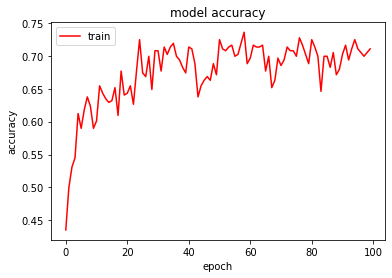

In [52]:
plt.plot(history.history['acc'], color='Red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

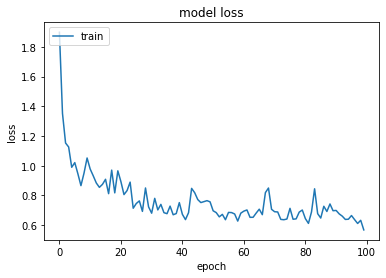

In [53]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
from keras.models import load_model 

model=load_model('Model.h5')

In [55]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 1s 170ms/step - loss: 1.2669 - acc: 0.7500


In [56]:
print("Test Loss: ",test_loss)
print("Test Accuracy: ",round(test_acc*100,2),"%")

Test Loss:  1.2669135332107544
Test Accuracy:  75.0 %


# Validation

In [58]:
y_pred=model.predict(x_val)
metric=tf.keras.metrics.Accuracy()
metric.update_state(y_pred, y_val)
metric.result().numpy()

0.035555556

In [59]:
val_acc=round(metric.result().numpy()*100,2)

In [60]:
print("Accuracy of validation set is {a}%".format(a=val_acc))

Accuracy of validation set is 3.56%


# Predicting

In [61]:
import easygui
import imageio

In [62]:
print("Submit your image")
flag=0
while(flag==0):    
    ImagePath=easygui.fileopenbox()
    img=cv2.imread(ImagePath)
    if img is None:
            print("Can not find any image. Choose appropriate file")
            continue
    else:
        flag=1

Submit your image


In [63]:
img.shape

(1152, 1500, 3)

In [64]:
img=cv2.resize(img,(227,227))

In [65]:
img.shape

(227, 227, 3)

In [66]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [67]:
from PIL import Image as im

In [68]:
image=im.fromarray(img)

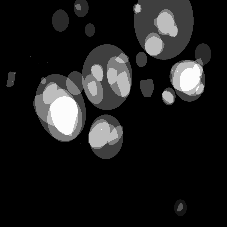

In [69]:
image

In [70]:
img=img[np.newaxis,...]

In [71]:
img.shape

(1, 227, 227, 3)

In [72]:
ans=model.predict(img)

In [73]:
ans

array([[7.2904974e-03, 1.8583357e-01, 8.0524790e-01, 1.2291152e-03,
        3.9896450e-04]], dtype=float32)

In [74]:
index=np.argmax(ans)

In [75]:
index

2

In [76]:
accuracy=round((np.amax(ans)*100),2)

In [77]:
print("There is a {a}% chance that the given shoe is {d}".format(a=accuracy, d=labels[index]))

There is a 80.52% chance that the given shoe is groundtruth-hemorrhages
